<a href="https://colab.research.google.com/github/namanverma4321/Face_Detection_using_Computer_Vision/blob/main/Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Folder_for_Face_Recognition

/content/drive/MyDrive/Folder_for_Face_Recognition


###Import essential libraries

In [3]:
from PIL import Image
import os
import re

from skimage.feature import hog

import matplotlib.pyplot as plt
import numpy as np

import pylab as pl
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC


###Load new image

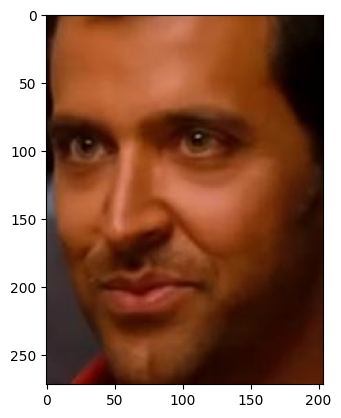

In [5]:
target_names=['AamirKhan', 'JayaBadhuri', 'HritikRoshan', 'AnupamKher']

# Uncomment different examples

# img = Image.open('NewPhotos/Amir_21.jpg')
img = Image.open('NewPhotos/HirtikRoshan_237.jpg')
# img = Image.open("NewPhotos/AmitabhBachan_34.jpg")
# img = Image.open('NewPhotos/AnupamKher_11.jpg')      # misclassification
# img = Image.open('NewPhotos/JayaBhaduri_24.jpg')


plt.imshow(img)


###Obtain image feature & label

<ipython-input-6-d31bcafd76ae>:3: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True, multichannel=True) # obtain HOG features


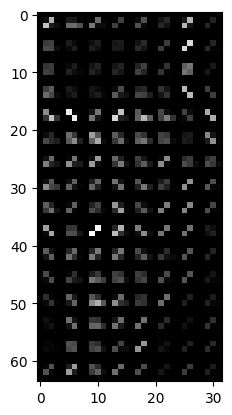

In [6]:
img=img.resize([32,64])

fd, hog_image = hog(img, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True, multichannel=True) # obtain HOG features
hog_image.shape
plt.imshow(hog_image, cmap='gray')

X=fd

In [7]:
X.shape

(3780,)

###Reduce dimenions with PCA

In [8]:
import pickle as pk
pca = pk.load(open("PCA.pkl",'rb'))
X = np.transpose(X.reshape(-1, 1))

X_test_pca = pca.transform(X)

In [9]:
X_test_pca.shape

(1, 25)

###Predictions on new image

In [10]:
import joblib
clf = joblib.load('SVM_classifier.pkl')
threshold=0.6

if clf.predict_proba(X_test_pca).max()>=threshold:
  y_pred=target_names[clf.predict_proba(X_test_pca).argmax()]
  prob=clf.predict_proba(X_test_pca).max()
else:
  y_pred='Unidentified'
  prob=clf.predict_proba(X_test_pca).max()

print('Identified as '+ str(y_pred)+ " with confidence "+str(round(prob*100))+ '%')

Identified as HritikRoshan with confidence 97%
